In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

train_path='/kaggle/input/home-data-for-ml-course/train.csv'
#訓練用のデータをtrainpathに入れる
test_path='/kaggle/input/home-data-for-ml-course/test.csv'
#テスト用のデータをtestpathに入れる
train_data=pd.read_csv(train_path)
test_data=pd.read_csv(test_path)
#csvファイルを読み込んでDataframe(表形式のデータ)に

print(train_data.head())
#訓練用データの最初の5行を表示
print(train_data.info())
#列や行、データ型などの情報を表示

print(train_data.isna().sum())
#列に含まれるnullの数を確認

num_cols = train_data.select_dtypes(include=['int64','float64']).columns
train_data[num_cols] = train_data[num_cols].fillna(train_data[num_cols].median())
#数値列は中央値で補完
cat_cols = train_data.select_dtypes(include=['object']).columns
train_data[cat_cols] = train_data[cat_cols].fillna(train_data[cat_cols].mode().iloc[0])
#文字列列は最頻値で補完

selected_features = [
    'OverallQual',
    'GrLivArea',
    'TotalBsmtSF',
    '1stFlrSF',
    'GarageCars',
    'BsmtFinSF1',
    'GarageArea',
    'LotArea',
    '2ndFlrSF',
    'FullBath',
    'TotRmsAbvGrd',
    'YearBuilt',
    'ExterQual',
    'YearRemodAdd',
    'LotFrontage',
    'MasVnrArea',
    'MoSold',
    'BsmtUnfSF',
    'WoodDeckSF',
    'GarageYrBlt'
]

X = train_data[selected_features]
#説明変数からSalePriceの行の削除
y=train_data['SalePrice']
#目的変数にSalePraceを設定

X = pd.get_dummies(X)
#文字列のデータを二進数に変換

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
#データを学習用と検証用に分ける

Aiowa_model=RandomForestRegressor(max_leaf_nodes=502,n_estimators=1000,random_state=1)
#モデルを毎度ランダムなランダムフォレストに設定
Aiowa_model.fit(train_X,train_y)
#学習用データで実行

val_pred=Aiowa_model.predict(val_X)
#検証用説明変数で予測
print("MAE:",mean_absolute_error(val_y,val_pred))

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': Aiowa_model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.head(30))

test_data = pd.read_csv(test_path)

# 訓練データと同じ前処理をする
num_cols_test = test_data.select_dtypes(include=['int64','float64']).columns
test_data[num_cols_test] = test_data[num_cols_test].fillna(train_data[num_cols_test].median())

cat_cols_test = test_data.select_dtypes(include=['object']).columns
test_data[cat_cols_test] = test_data[cat_cols_test].fillna(train_data[cat_cols_test].mode().iloc[0])

# 文字列列をダミー変数に変換

test_X = test_data[selected_features]
test_X=pd.get_dummies(test_data)
test_X = test_X.reindex(columns=X.columns, fill_value=0)

# 訓練データもダミーにしておく

Aiowa_model_fin=RandomForestRegressor(max_leaf_nodes=502,n_estimators=1000,random_state=1)
Aiowa_model_fin.fit(X,y)
test_preds=Aiowa_model_fin.predict(test_X,)

output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)




/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl  

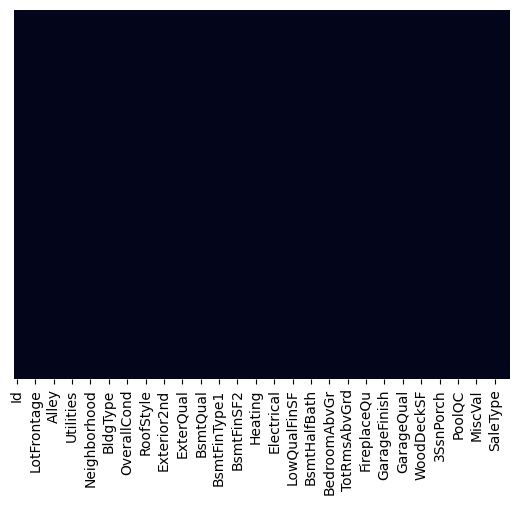

In [2]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False)

def get_mae(maxleaf,train_X,Val_X,train_y,Val_y):
    maxleaf_model=RandomForestRegressor(max_leaf_nodes=maxleaf,random_state=0)
    maxleaf_model.fit(train_X,train_y)
    maxleaf_preds= maxleaf_model.predict(val_X)
    maxleaf_mae=mean_absolute_error(maxleaf_preds,val_y)
    return(maxleaf_mae)

sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

def get_mae(maxleaf,train_X,Val_X,train_y,Val_y):
    maxleaf_model=RandomForestRegressor(max_leaf_nodes=maxleaf,random_state=0)
    maxleaf_model.fit(train_X,train_y)
    maxleaf_preds= maxleaf_model.predict(val_X)
    maxleaf_mae=mean_absolute_error(maxleaf_preds,val_y)
    return(maxleaf_mae)
    
